In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv('zomato.csv')

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
df.corr()

,votes
votes,1.0


In [7]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [8]:
df.drop(['url','address','phone','dish_liked','reviews_list','menu_item'],axis=1,inplace=True)

In [9]:
df['online_order'].values

array(['Yes', 'Yes', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [10]:
df.index

RangeIndex(start=0, stop=51717, step=1)

In [11]:
df['online_order']=pd.Series(np.where(df['online_order'].values=="Yes",1,0),df.index)

In [12]:
df['online_order'].value_counts()

1    30444
0    21273
Name: online_order, dtype: int64

In [13]:
df['book_table']=pd.Series(np.where(df['book_table'].values=="Yes",1,0),df.index)

In [14]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,1,1,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,1,0,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,1,0,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,0,0,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


### Dropping Duplicate

In [15]:
df.drop_duplicates(inplace=True)
df.shape

(51609, 11)

### Cleaning Rate Column

In [16]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

#### Removing "NEW", "-" and "/5" from rate column

In [17]:
def handelrate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)
df['rate'] = df['rate'].apply(handelrate)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

 ### Filling Null value in rate column with mean

In [18]:
df['rate'].fillna(df['rate'].mean(),inplace=True)

In [19]:
df['rate'].isnull().sum()

0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  int32  
 2   book_table                   51609 non-null  int32  
 3   rate                         51609 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   cuisines                     51564 non-null  object 
 8   approx_cost(for two people)  51265 non-null  object 
 9   listed_in(type)              51609 non-null  object 
 10  listed_in(city)              51609 non-null  object 
dtypes: float64(1), int32(2), int64(1), object(7)
memory usage: 4.3+ MB


#### Dropping Null values if there is not so many null values.

In [21]:
df.dropna(inplace=True)

In [22]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [23]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [24]:
df.rename(columns={'approx_cost(for two people)':'cost2plates','listed_in(type)':'Type','listed_in(city)':"city"},inplace=True)

In [25]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,Type,city
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [26]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [27]:
df['city'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

#### City and loaction ,both are there lets keep only one

In [28]:
df=df.drop(['city'],axis=1)

In [29]:
df['cost2plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

### Removing , from cost2plates column

In [30]:
def handlecomma(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',','')
        return float(value)
    else:
        return float(value)
df['cost2plates']=df['cost2plates'].apply(handlecomma)
df['cost2plates'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

### Cleaning Rest type column

In [31]:
df['rest_type'].value_counts()

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [32]:
rest_types = df['rest_type'].value_counts(ascending = False)
rest_types

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [33]:
rest_type_less_than1000 = rest_types[rest_types<1000]
rest_type_less_than1000

Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: rest_type, Length: 85, dtype: int64

#### Making rest types less than 1000 in frequency as others 

In [34]:
def handle_rest_type(value):
    if (value in rest_type_less_than1000):
        return 'others'
    else:
        return value
df['rest_type'] = df['rest_type'].apply(handle_rest_type)
df['rest_type'].value_counts()

Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: rest_type, dtype: int64

In [35]:
df['location'].value_counts()

BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

#### Cleaning loaction column

In [36]:
location = df['location'].value_counts(ascending= False)
location_lessthan300 = location[location<300]

def handle_location(value):
    if(value in location_lessthan300):
        return 'others'
    else:
        return value
df['location'] = df['location'].apply(handle_location)
df['location'].value_counts()

BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
Lavelle Ro

In [37]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,Type
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,1,0,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [38]:
df['cuisines'].value_counts()

North Indian                                2852
North Indian, Chinese                       2351
South Indian                                1820
Biryani                                      903
Bakery, Desserts                             898
                                            ... 
North Indian, Chinese, Oriya, Mithai           1
Beverages, Burger                              1
North Indian, Mughlai, Lucknowi                1
Continental, Thai, North Indian, Chinese       1
North Indian, Chinese, Arabian, Momos          1
Name: cuisines, Length: 2704, dtype: int64

#### Cleaning Cuisines Column

In [39]:
cuisines = df['cuisines'].value_counts(ascending = False)
cuisines_lessthan100 = cuisines[cuisines<100]

def handle_cuisines(value):
    if (value in cuisines_lessthan100):
        return 'others'
    else:
        return value
df['cuisines'] = df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts()
        

others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

In [40]:
df['Type'].value_counts()

Delivery              25579
Dine-out              17562
Desserts               3559
Cafes                  1703
Drinks & nightlife     1084
Buffet                  869
Pubs and bars           686
Name: Type, dtype: int64

#### Countplot of various loaction

C:\Users\Kishan Ji\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Shanti Nagar'),
  Text(11, 0, 'Koramangala 5th Block'),
  Text(12, 0, 'Richmond Road'),
  Text(13, 0, 'Koramangala 7th Block'),
  Text(14, 0, 'Koramangala 4th Block'),
  Text(15, 0, 'Bellandur'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Whitefield'),
  Text(18, 0, 'Old Airport Road'),
  Text(19, 0, 'Indiranagar'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Frazer Town'),
  Text(22, 0, 'MG Road'),
  Text(23, 0, 'Brigade Road'),
  Text(24, 0, 'Lavelle Road'),
  Text(25, 0, 'Church Street'),
  

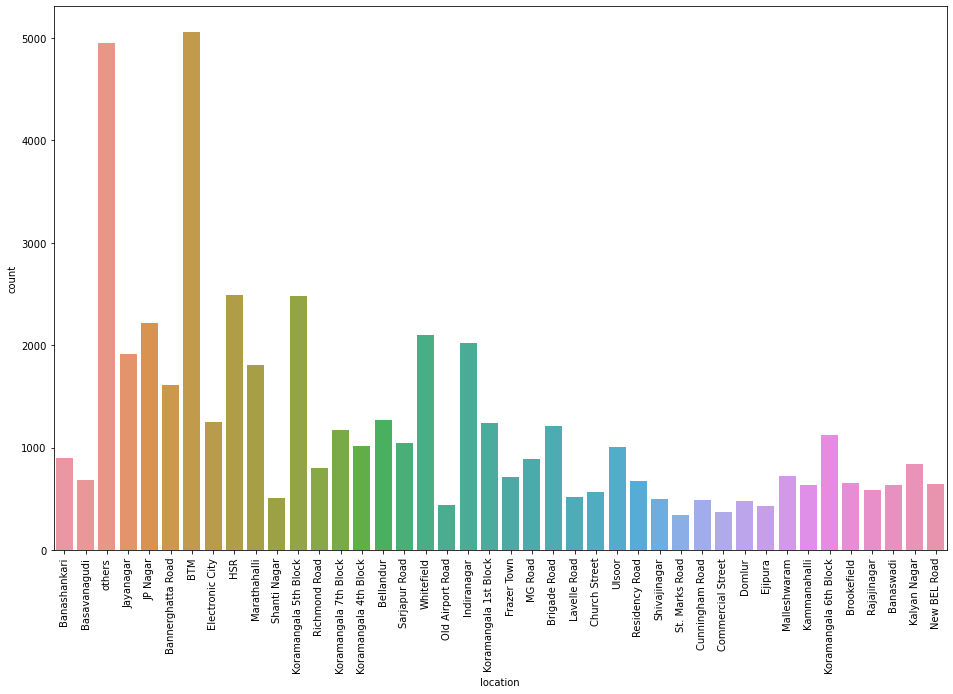

In [41]:
plt.figure(figsize=(16,10))
ax = sns.countplot(df['location'])
plt.xticks(rotation=90)

#### Visualizing Online order

<AxesSubplot:xlabel='online_order', ylabel='count'>

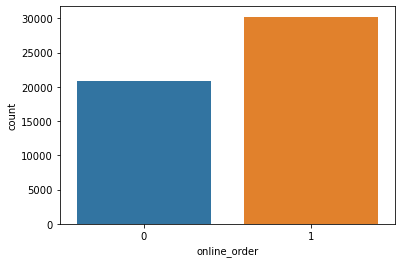

In [42]:
sns.countplot(x='online_order',data=df)

##### Book table

<AxesSubplot:xlabel='book_table', ylabel='count'>

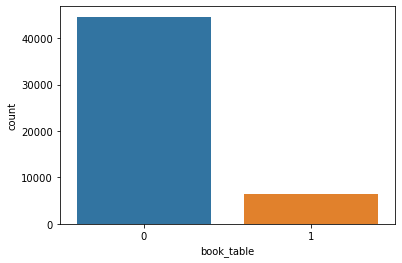

In [43]:
sns.countplot(x='book_table',data=df)

#### Online order vs rating

<AxesSubplot:xlabel='online_order', ylabel='rate'>

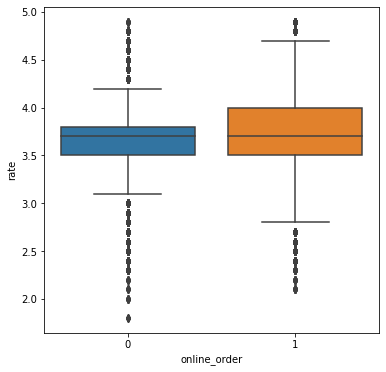

In [44]:
plt.figure(figsize=(6,6))
sns.boxplot(x ='online_order',y='rate',data=df)

#### Book table vs rating

<AxesSubplot:xlabel='book_table', ylabel='rate'>

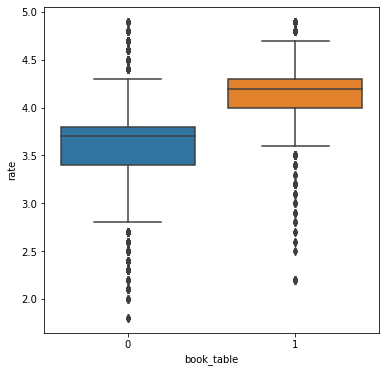

In [45]:
plt.figure(figsize=(6,6))
sns.boxplot(x ='book_table',y='rate',data=df)

##### Frequency of rate column

(array([   40.,   143.,   652.,  2370.,  5661.,  8486., 21422.,  8215.,
         3466.,   587.]),
 array([1.8 , 2.11, 2.42, 2.73, 3.04, 3.35, 3.66, 3.97, 4.28, 4.59, 4.9 ]),
 <BarContainer object of 10 artists>)

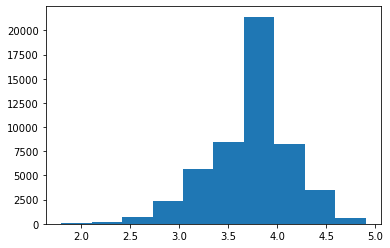

In [46]:
plt.hist(df['rate'])

In [47]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost2plates', 'Type'],
      dtype='object')

In [48]:
df1 = df.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1 = pd.read_csv('location_online.csv')
df1 = pd.pivot_table(df1 , values=None,index =['location'], columns=['online_order'], fill_value=0, aggfunc=np.sum)

In [49]:
df1

name      
online_order              0     1
location                         
BTM                    1763  3293
Banashankari            397   505
Banaswadi               302   338
Bannerghatta Road       685   924
Basavanagudi            243   441
Bellandur               517   751
Brigade Road            552   658
Brookefield             239   417
Church Street           226   340
Commercial Street       228   142
Cunningham Road         168   322
Domlur                  247   235
Ejipura                 214   219
Electronic City         676   570
Frazer Town             287   427
HSR                     584  1910
Indiranagar             697  1329
JP Nagar                911  1307
Jayanagar               552  1364
Kalyan Nagar            350   491
Kammanahalli            264   375
Koramangala 1st Block   384   852
Koramangala 4th Block   459   558
Koramangala 5th Block   866  1613
Koramangala 6th Block   445   682
Koramangala 7th Block   389   785
Lavelle Road            315   203
MG Road                 520   373
Malleshwaram            309   412
Marathahalli            701  1104
New BEL Road            255   389
Old Airport Road        221   216
Rajajinagar             286   305
Residency Road          424   247
Richmond Road           557   246
Sarjapur Road           323   724
Shanti Nagar            289   219
Shivajinagar            354   144
St. Marks Road          176   167
Ulsoor                  389   622
Whitefield              986  1119
others                 2064  2890

<AxesSubplot:xlabel='location'>

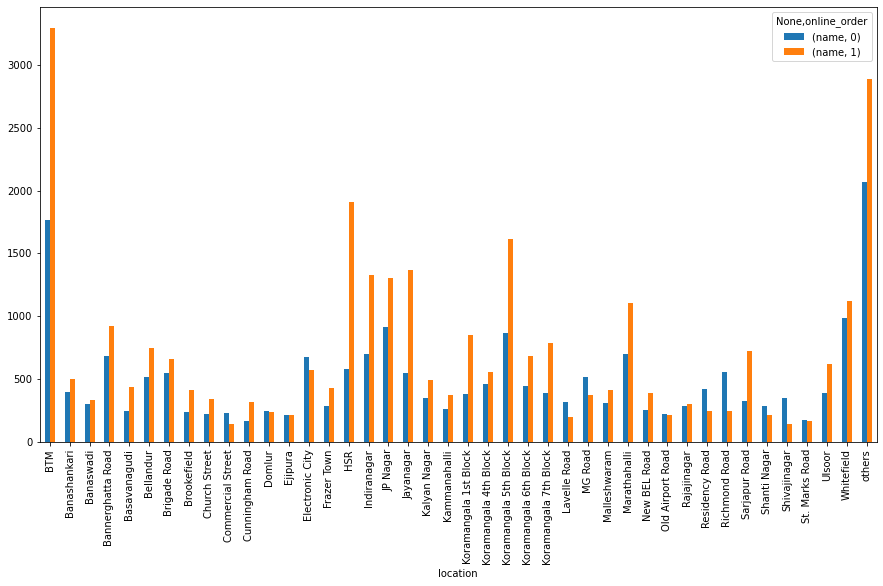

In [50]:
df1.plot(kind='bar',figsize =(15,8))

#### Visualizing Book Table Facility, Location Wise

In [51]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost2plates', 'Type'],
      dtype='object')

In [52]:
df2 = df.groupby(['location','book_table'])['name'].count()
df2.to_csv('location_booktable.csv')
df2 = pd.read_csv('location_booktable.csv')
df2 = pd.pivot_table(df2 , values=None,index =['location'], columns=['book_table'], fill_value=0, aggfunc=np.sum)

In [53]:
df2

name     
book_table                0    1
location                        
BTM                    4889  167
Banashankari            839   63
Banaswadi               632    8
Bannerghatta Road      1510   99
Basavanagudi            668   16
Bellandur              1170   98
Brigade Road           1034  176
Brookefield             582   74
Church Street           385  181
Commercial Street       370    0
Cunningham Road         315  175
Domlur                  427   55
Ejipura                 433    0
Electronic City        1148   98
Frazer Town             706    8
HSR                    2277  217
Indiranagar            1578  448
JP Nagar               1903  315
Jayanagar              1637  279
Kalyan Nagar            692  149
Kammanahalli            590   49
Koramangala 1st Block  1186   50
Koramangala 4th Block   695  322
Koramangala 5th Block  1787  692
Koramangala 6th Block  1015  112
Koramangala 7th Block  1012  162
Lavelle Road            290  228
MG Road                 546  347
Malleshwaram            632   89
Marathahalli           1642  163
New BEL Road            588   56
Old Airport Road        378   59
Rajajinagar             550   41
Residency Road          522  149
Richmond Road           687  116
Sarjapur Road           893  154
Shanti Nagar            451   57
Shivajinagar            475   23
St. Marks Road          219  124
Ulsoor                  834  177
Whitefield             1852  253
others                 4587  367

<AxesSubplot:xlabel='location'>

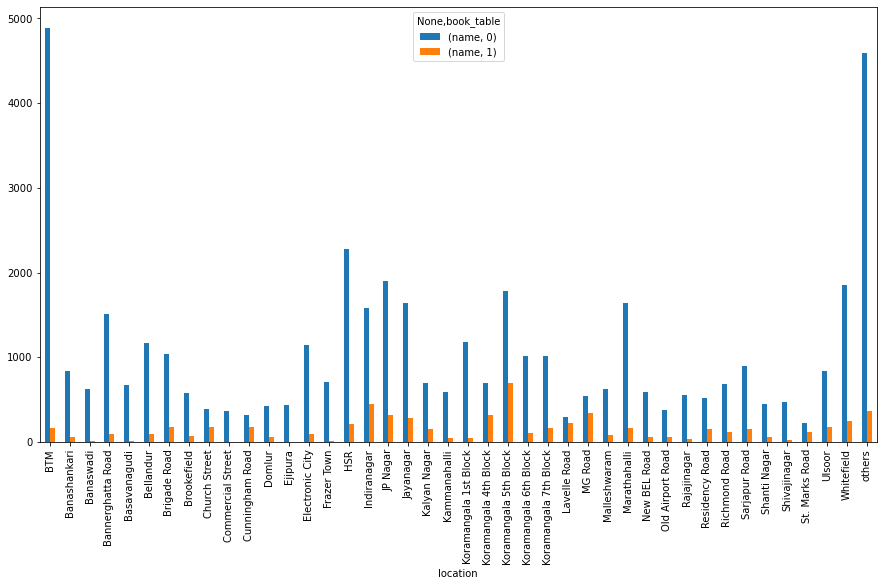

In [54]:
df2.plot(kind = 'bar',figsize=(15,8))

In [55]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost2plates', 'Type'],
      dtype='object')

### Visualize the Type of restaurent vs Rate

<AxesSubplot:xlabel='Type', ylabel='rate'>

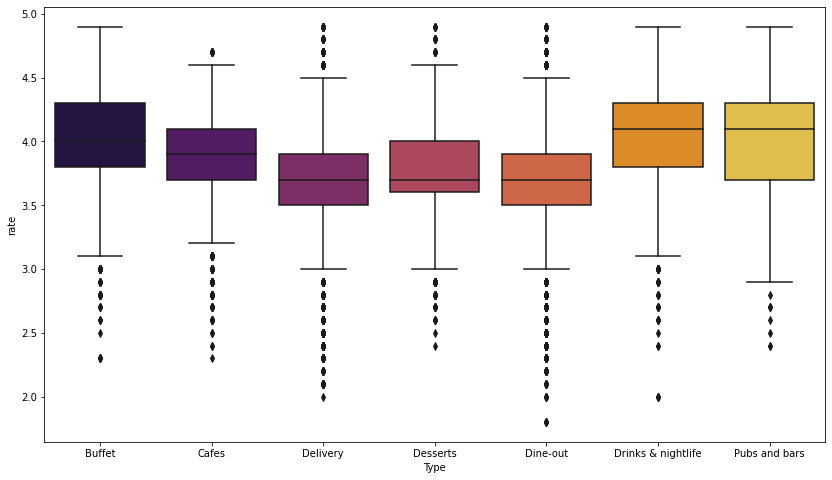

In [56]:
plt.figure(figsize = (14,8))
sns.boxplot(x ='Type' , y = 'rate' ,data= df, palette = 'inferno')

### Grouping Type of Restaurent, location wise

In [57]:
df3 = df.groupby(['location','Type'])['name'].count()
df3.to_csv('location_type_of_restaurent.csv')
df3 = pd.read_csv('location_type_of_restaurent.csv')
df3 = pd.pivot_table(df3 , values=None,index =['location'], columns=['Type'], fill_value=0, aggfunc=np.sum)

In [58]:
df3

name                                   \
Type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       21    83     3053      198     1660   
Banashankari               7    36      418       71      356   
Banaswadi                  0    24      310       37      262   
Bannerghatta Road          9    46      828      137      578   
Basavanagudi               7    11      344       66      251   
Bellandur                 28    36      617       75      479   
Brigade Road              25    46      497      108      455   
Brookefield                6    17      339       45      245   
Church Street             19    51      193       29      215   
Commercial Street          0    13      121       77      159   
Cunningham Road           29    34      194       26      184   
Domlur                    15    13      261       35      135   
Ejipura                    0     0      245       16      172   
Electronic City           23    24      570       71      516   
Frazer Town                1    11      470       56      172   
HSR                       19    49     1694      120      580   
Indiranagar               38    97     1091      140      529   
JP Nagar                  45    76     1151      166      722   
Jayanagar                 27    77     1043      182      575   
Kalyan Nagar               9    45      366       88      315   
Kammanahalli               2    27      329       35      240   
Koramangala 1st Block      3    26      716       70      398   
Koramangala 4th Block     21    53      464       81      302   
Koramangala 5th Block     65   146     1075      209      842   
Koramangala 6th Block     18    43      511       70      411   
Koramangala 7th Block     25    52      503      127      417   
Lavelle Road              30    27      127       50      191   
MG Road                   51    76      266       68      343   
Malleshwaram              11    31      269       85      291   
Marathahalli              34    32      980      105      630   
New BEL Road               4    29      338       33      224   
Old Airport Road          12     5      200       35      164   
Rajajinagar               10     4      258       55      251   
Residency Road            20    31      187       63      289   
Richmond Road             63    21      257       78      356   
Sarjapur Road             25    22      558       82      319   
Shanti Nagar               9    22      198       39      229   
Shivajinagar               6    17      143       37      280   
St. Marks Road             5    10      111       10      145   
Ulsoor                    16    56      456       71      359   
Whitefield                28    51     1041      137      768   
others                    83   133     2787      276     1553   

                                                        
Type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   22            19  
Banashankari                          14             0  
Banaswadi                              6             1  
Bannerghatta Road                      9             2  
Basavanagudi                           5             0  
Bellandur                             17            16  
Brigade Road                          57            22  
Brookefield                            4             0  
Church Street                         36            23  
Commercial Street                      0             0  
Cunningham Road                       16             7  
Domlur                                12            11  
Ejipura                                0             0  
Electronic City                       21            21  
Frazer Town                            2             2  
HSR                                   14            18  
Indiranagar    

<AxesSubplot:xlabel='location'>

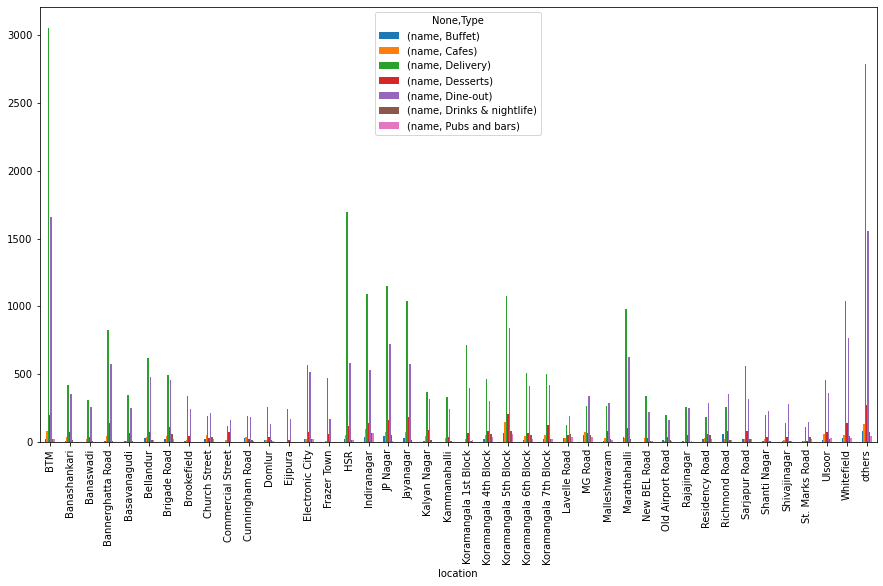

In [59]:
df3.plot(kind = 'bar',figsize=(15,8))

In [60]:
df['rest_type'].value_counts()

Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: rest_type, dtype: int64

#### Restaurent  type vs rating

In [61]:
df4 = df.groupby(['location','rest_type'])['name'].count()
df4.to_csv('location_rest_type.csv')
df4 = pd.read_csv('location_rest_type.csv')
df4 = pd.pivot_table(df4 , values=None,index =['location'], columns=['rest_type'], fill_value=0, aggfunc=np.sum)

In [62]:
df4

name                                                 \
rest_type             Bakery Cafe Casual Dining Casual Dining, Bar Delivery   
location                                                                      
BTM                       76  290           711                 22      254   
Banashankari              20   87           148                  1       28   
Banaswadi                 27   44           106                  9       13   
Bannerghatta Road         53   79           312                 10       69   
Basavanagudi              35   42            98                  8        0   
Bellandur                 16   55           295                 28       60   
Brigade Road              30  111           289                 26        0   
Brookefield               23   35           135                 12        6   
Church Street              0   92           151                 71        0   
Commercial Street          6   20            71                  0        0   
Cunningham Road            3   46           202                  0        4   
Domlur                    26   11            90                 11       58   
Ejipura                    0    0            27                  0       45   
Electronic City           39   43           282                 19       61   
Frazer Town               33   35           147                  0       61   
HSR                       33  141           541                 23      186   
Indiranagar               28  189           477                 51      171   
JP Nagar                  63  158           543                 53      123   
Jayanagar                 59  201           481                 18       14   
Kalyan Nagar              17   75           240                  9       31   
Kammanahalli               2   51           143                 10       24   
Koramangala 1st Block     42   97           102                 57      107   
Koramangala 4th Block     33  138           179                 44      121   
Koramangala 5th Block     28  351           559                 81       50   
Koramangala 6th Block     14  109           216                  0       80   
Koramangala 7th Block     25  117           283                 59       97   
Lavelle Road              20    5            79                113       10   
MG Road                    3  102           172                 30        6   
Malleshwaram              15   58           115                 14        7   
Marathahalli              49   67           392                 46      109   
New BEL Road               9   73           113                  2       22   
Old Airport Road          23    9            72                  8       32   
Rajajinagar               16    6           112                 16       12   
Residency Road             0   57           152                  9       14   
Richmond Road             10   43           203                 14        8   
Sarjapur Road             52   48           198                 16       95   
Shanti Nagar               6   46           145                  0       13   
Shivajinagar               6   22            43                 23        0   
St. Marks Road             0   20            95                 60        0   
Ulsoor                    38  129           174                 48       27   
Whitefield                58   65           451                 37      137   
others                   104  315           909                 72      419   

                                                                            
rest_type             Dessert Parlor Quick Bites Takeaway, Delivery others  
location                                                                    
BTM                              111        2707                334    551  
Banashankari                      47         428                 17    126  
Banaswadi                         12         325                 22     82  
Banner

#### Interested people who are interested in voting of which area.

In [63]:
df4 = df[['location','votes']]
df5 = df4.groupby(['location'])['votes'].sum()
df5 = df5.to_frame()
df5 = df5.sort_values('votes',ascending=False)


In [64]:
df5.head()

,votes
location,
Koramangala 5th Block,2214083
Indiranagar,1165909
Koramangala 4th Block,685156
Church Street,590306
JP Nagar,586522


<AxesSubplot:xlabel='location'>

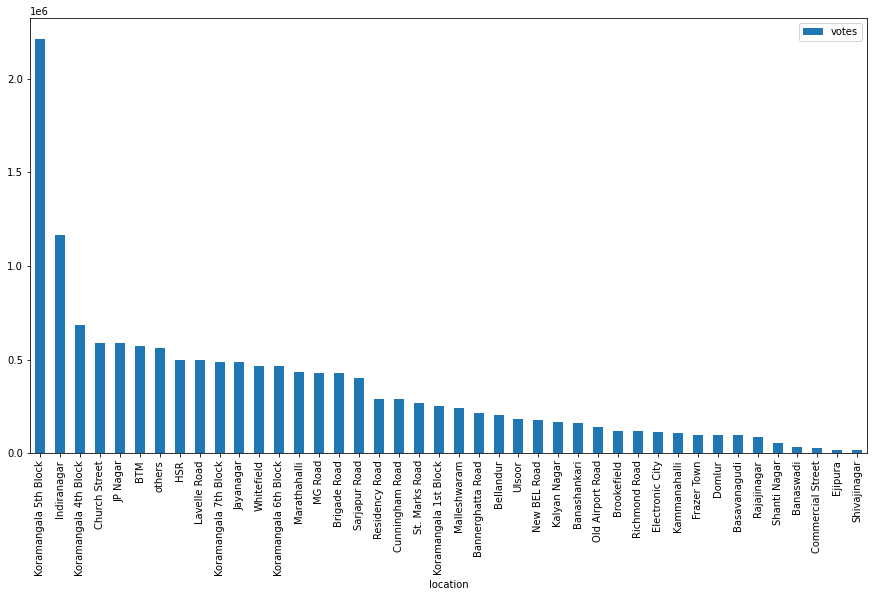

In [65]:
df5.plot(kind='bar',figsize=(15,8))

In [66]:
df6 = df[['cuisines','votes']]
df6.drop_duplicates()
df7 = df6.groupby(['cuisines'])['votes'].sum()
df7 = df7.to_frame()
df7 = df7.sort_values('votes',ascending=False)

In [67]:
df7.head()

,votes
cuisines,
others,11542182
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706


In [68]:
df7 = df7.iloc[1:,:]

In [69]:
df7.head()

,votes
cuisines,
North Indian,516310
"North Indian, Chinese",258225
South Indian,161975
"North Indian, Mughlai",103706
Chinese,101728


C:\Users\Kishan Ji\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68]),
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'North Indian, Chinese'),
  Text(2, 0, 'South Indian'),
  Text(3, 0, 'North Indian, Mughlai'),
  Text(4, 0, 'Chinese'),
  Text(5, 0, 'Cafe'),
  Text(6, 0, 'North Indian, South Indian'),
  Text(7, 0, 'Desserts'),
  Text(8, 0, 'Chinese, Momos'),
  Text(9, 0, 'Ice Cream, Desserts'),
  Text(10, 0, 'Cafe, Continental'),
  Text(11, 0, 'Biryani, North Indian, Chinese'),
  Text(12, 0, 'Chinese, Thai, Momos'),
  Text(13, 0, 'South Indian, North Indian, Chinese'),
  Text(14, 0, 'Desserts, Beverages'),
  Text(15, 0, 'Biryani'),
  Text(16, 0, 'Finger Food'),
  Text(17, 0, 'Bakery, Desserts'),
  Text(18, 0, 'Burger, Fast Food'),
  Text(19, 0, '

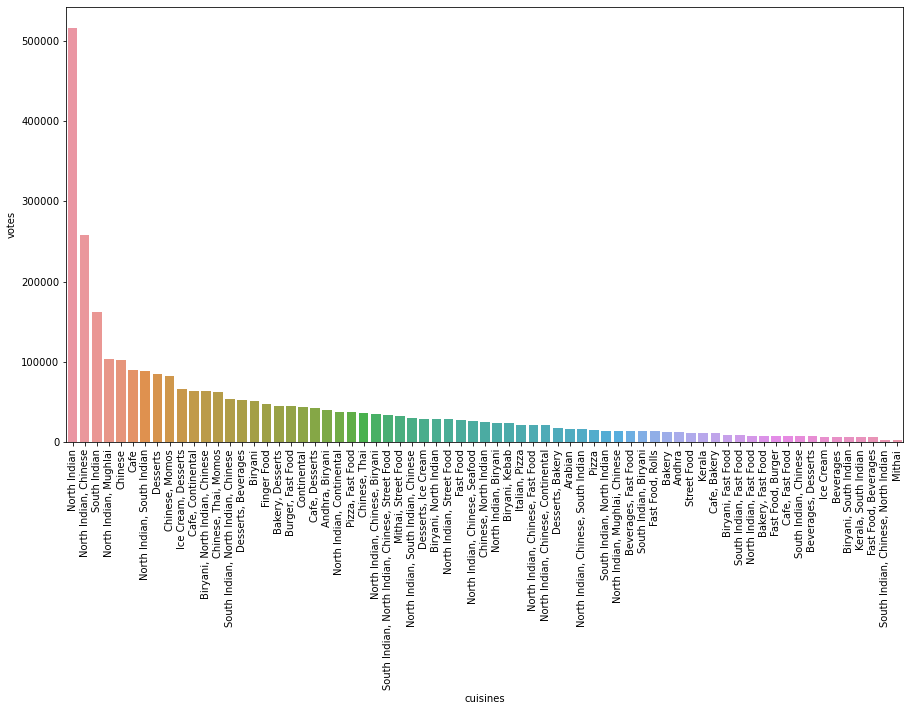

In [70]:
plt.figure(figsize=(15,8))
sns.barplot(df7.index , df7['votes'])
plt.xticks(rotation=90)

In [71]:
df.drop(['name'],axis=1,inplace=True)

In [72]:
df.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,Type
0,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,1,0,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet
2,1,0,3.8,918,Banashankari,others,others,800.0,Buffet
3,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,0,0,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet


In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [74]:
df['rest_type'].value_counts()

Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: rest_type, dtype: int64

In [75]:
le.fit_transform((df.location).values)
le_location_mapping= dict(zip(le.classes_,le.transform(le.classes_)))
le_location_mapping

{'BTM': 0,
 'Banashankari': 1,
 'Banaswadi': 2,
 'Bannerghatta Road': 3,
 'Basavanagudi': 4,
 'Bellandur': 5,
 'Brigade Road': 6,
 'Brookefield': 7,
 'Church Street': 8,
 'Commercial Street': 9,
 'Cunningham Road': 10,
 'Domlur': 11,
 'Ejipura': 12,
 'Electronic City': 13,
 'Frazer Town': 14,
 'HSR': 15,
 'Indiranagar': 16,
 'JP Nagar': 17,
 'Jayanagar': 18,
 'Kalyan Nagar': 19,
 'Kammanahalli': 20,
 'Koramangala 1st Block': 21,
 'Koramangala 4th Block': 22,
 'Koramangala 5th Block': 23,
 'Koramangala 6th Block': 24,
 'Koramangala 7th Block': 25,
 'Lavelle Road': 26,
 'MG Road': 27,
 'Malleshwaram': 28,
 'Marathahalli': 29,
 'New BEL Road': 30,
 'Old Airport Road': 31,
 'Rajajinagar': 32,
 'Residency Road': 33,
 'Richmond Road': 34,
 'Sarjapur Road': 35,
 'Shanti Nagar': 36,
 'Shivajinagar': 37,
 'St. Marks Road': 38,
 'Ulsoor': 39,
 'Whitefield': 40,
 'others': 41}

In [76]:
le.fit_transform((df.rest_type).values)
le_rest_type_mapping= dict(zip(le.classes_,le.transform(le.classes_)))
le_rest_type_mapping

{'Bakery': 0,
 'Cafe': 1,
 'Casual Dining': 2,
 'Casual Dining, Bar': 3,
 'Delivery': 4,
 'Dessert Parlor': 5,
 'Quick Bites': 6,
 'Takeaway, Delivery': 7,
 'others': 8}

In [77]:
le.fit_transform((df.cuisines).values)
le_cuisines_mapping= dict(zip(le.classes_,le.transform(le.classes_)))
le_cuisines_mapping

{'Andhra': 0,
 'Andhra, Biryani': 1,
 'Arabian': 2,
 'Bakery': 3,
 'Bakery, Desserts': 4,
 'Bakery, Fast Food': 5,
 'Beverages': 6,
 'Beverages, Desserts': 7,
 'Beverages, Fast Food': 8,
 'Biryani': 9,
 'Biryani, Fast Food': 10,
 'Biryani, Kebab': 11,
 'Biryani, North Indian': 12,
 'Biryani, North Indian, Chinese': 13,
 'Biryani, South Indian': 14,
 'Burger, Fast Food': 15,
 'Cafe': 16,
 'Cafe, Bakery': 17,
 'Cafe, Continental': 18,
 'Cafe, Desserts': 19,
 'Cafe, Fast Food': 20,
 'Chinese': 21,
 'Chinese, Momos': 22,
 'Chinese, North Indian': 23,
 'Chinese, Thai': 24,
 'Chinese, Thai, Momos': 25,
 'Continental': 26,
 'Desserts': 27,
 'Desserts, Bakery': 28,
 'Desserts, Beverages': 29,
 'Desserts, Ice Cream': 30,
 'Fast Food': 31,
 'Fast Food, Beverages': 32,
 'Fast Food, Burger': 33,
 'Fast Food, Rolls': 34,
 'Finger Food': 35,
 'Ice Cream': 36,
 'Ice Cream, Desserts': 37,
 'Italian, Pizza': 38,
 'Kerala': 39,
 'Kerala, South Indian': 40,
 'Mithai': 41,
 'Mithai, Street Food': 42,
 'No

In [79]:
le.fit_transform((df.Type).values)
le_Type_mapping= dict(zip(le.classes_,le.transform(le.classes_)))
le_Type_mapping

{'Buffet': 0,
 'Cafes': 1,
 'Delivery': 2,
 'Desserts': 3,
 'Dine-out': 4,
 'Drinks & nightlife': 5,
 'Pubs and bars': 6}

In [80]:
df.location = le.fit_transform(df.location)
df.rest_type= le.fit_transform(df.rest_type)
df.cuisines = le.fit_transform(df.cost2plates)
df.Type     = le.fit_transform(df.Type)

In [99]:
max(df['votes'])

16832

In [82]:
df.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,Type
0,1,1,4.1,775,1,2,32,800.0,0
1,1,0,4.1,787,1,2,32,800.0,0
2,1,0,3.8,918,1,8,32,800.0,0
3,0,0,3.7,88,1,6,18,300.0,0
4,0,0,3.8,166,4,2,28,600.0,0


In [83]:
x=df.drop(['rate'],axis=1)
y=df['rate']

In [84]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=62)
x_train,x_val,y_train,y_val= train_test_split(x,y,test_size=0.1,random_state=62)

#### Linear Regression


In [85]:
lr = LinearRegression()

In [86]:
lr.fit(x_train,y_train)

LinearRegression()

In [87]:
y_pred=lr.predict(x_train) ## Predicting value on train data and check accuracy score
metrics.r2_score(y_pred,y_train)

-1.7410870241487308

In [88]:
y_pred_test=lr.predict(x_test) ## Predicting value on test data and check accuracy score
metrics.r2_score(y_pred_test,y_test)

-1.5482420641750934

#### Random Forest Regressor

In [89]:
rf_model=RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=.0001)
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)## Preddicting value on test data and check accuracy 
metrics.r2_score(y_test,y_pred)

0.8543520108026648

In [90]:
## Predicting value on train data and checking accuracy
y_pred_train=rf_model.predict(x_train)
metrics.r2_score(y_train,y_pred_train)

0.8896136076056411

#### Extra Tree Regressor

In [91]:
## Prepairing extra Tree regressor
ext_model=ExtraTreesRegressor(n_estimators=500,random_state=43)
ext_model.fit(x_train,y_train)
y_pred_ext=ext_model.predict(x_test) ##  Preedicting value on test data and check accuracy
metrics.r2_score(y_pred_ext,y_test)

0.9487365069111762

In [92]:
y_pred_ext_train=ext_model.predict(x_train) ## peedicting value on train data and checking accuracy
metrics.r2_score(y_pred_ext_train,y_train)

0.99168481846819

In [93]:
feature_importance=pd.DataFrame({
    'ext_model':ext_model.feature_importances_ },index=x_train.columns)
     

In [94]:
feature_importance

,ext_model
online_order,0.018751
book_table,0.167152
votes,0.410428
location,0.161639
rest_type,0.080559
cuisines,0.074440
cost2plates,0.073720
Type,0.013312


<AxesSubplot:>

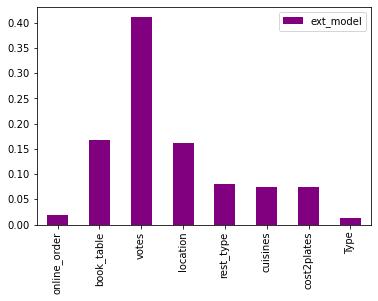

In [95]:
feature_importance.plot(kind='bar',color='purple')

import pickle
pickle.dump(ext_model,open('zomato.pkl','wb'))
ext_model=pickle.load(open('zomato.pkl','rb'))